# Part II: Exploratory Data Analysis (EDA)
Welcome back, you! 

Before we dive into any form of analysis, it's important to make sure that the data that you're working with is <strong>clean, organized, and sound</strong>. 

It's also important to explore the data you have using visualization tools to identify any possible inherent patterns.

In this notebook, you will do the following:
1. Load the CSV that you obtained from Part I (go back there and do it first if you haven't)
2. Examine the quality and integrity of the data
3. Visualize prices over time
4. Engineer new features
5. Perform more visualization

### Step 1: Import the following libraries
- pandas
- matplotlib.pyplot as plt
- seaborn

In [2]:
# Step 1: Import your libraries here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns

### Step 2: Load your CSV from Part I into a DataFrame
Let's make sure the first column of your CSV becomes the index to match how it looked like when you had the DataFrame from Part I. 

You'll have to figure out how to turn one of your <strong>cols into index</strong>.

In [7]:
# Step 2: Read your CSV with pandas

#index_col puts the date into rows
df = pd.read_csv('data.csv', index_col =0)
df

,1. open,2. high,3. low,4. close,5. volume
2020-09-08,0.5081,0.5081,0.5081,0.5081,0
2020-09-04,0.5081,0.5081,0.5081,0.5081,0
2020-09-03,0.5081,0.5081,0.5081,0.5081,0
2020-09-02,0.5081,0.5081,0.5081,0.5081,0
2020-09-01,0.5081,0.5081,0.5081,0.5081,0
...,...,...,...,...,...
2007-07-19,0.7900,0.7900,0.7900,0.7900,11000
2007-07-18,0.8000,0.8000,0.8000,0.8000,0
2007-07-17,0.8000,0.8000,0.8000,0.8000,0
2007-07-16,0.8000,0.8000,0.8000,0.8000,0


### Step 3: Check for total of NA data in DataFrame columns
We do this to make sure that there is no missing data in the dataset (for this dataset it's a no but it's good to check nonetheless). The image below shows what you should be expecting when you run the code cell.

Of course, it's more useful if you can get the sum of the nulls in each column. 

Make it a habit to check! You'll save yourself a lot of pain when you check for null values since some functions and methods do not work well with missing data.

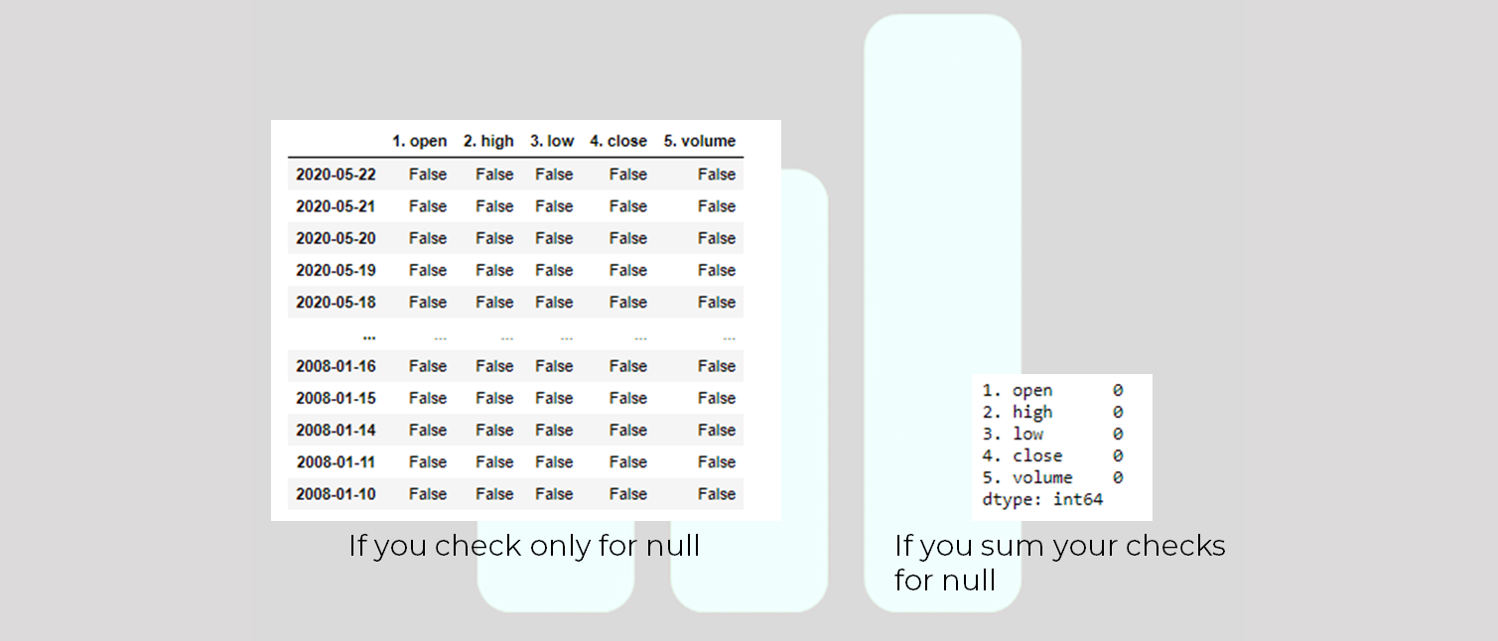

P.S. Don't worry if your data doesn't look like the picture above - it's just an example.

In [ ]:
# Step 3: Check for missing data in columns in DataFrame

### Step 4: Check your DataFrame's Index data type
The reason for checking is because we'll be slicing the DataFrame later based on the date in the index, and we need to make sure that it's a <strong>DateTime</strong> object.

In [ ]:
# Step 4: Check your DataFrame type

### Step 5: Convert the Index into a DateTime object
If you loaded the CSV the usual way, you're most likely not going to have <strong>DateTime</strong> as your type. If you do, that's freaking awesome and well done.

If not, no worries - we can easily replace the index of the DataFrame by:
1. Declaring a variable and storing the DataFrame's index inside
2. Turn the variable containing the DataFrame's index into a DateTime object using one of panda's built-in methods
3. Replace your original DataFrame index with the newly converted variable 
4. Do Step 4 again to see what type of data your Index is now

Hint: Google <strong>"change index to datetime pandas"</strong>

In [10]:
# Step 5a: Convert your index into a DateTime

df.index  = pd.to_datetime(df.index)
df.index

DatetimeIndex(['2020-09-08', '2020-09-04', '2020-09-03', '2020-09-02',
               '2020-09-01', '2020-08-31', '2020-08-28', '2020-08-27',
               '2020-08-26', '2020-08-25',
               ...
               '2007-07-26', '2007-07-25', '2007-07-24', '2007-07-23',
               '2007-07-20', '2007-07-19', '2007-07-18', '2007-07-17',
               '2007-07-16', '2007-07-13'],
              dtype='datetime64[ns]', length=3290, freq=None)

In [11]:
# Step 5b: Check your index's type again

type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

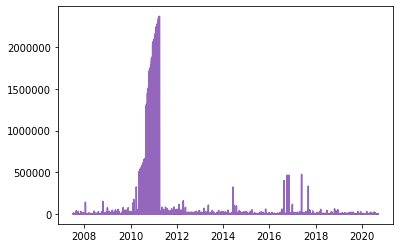

In [12]:
plt.plot(df)

### Step 6: Plot the five columns' data in DataFrame
There are many ways to do this, but since you've a DateTimeIndex, just use the DataFrame's method to plot the five columns in the same plot. 

Hint: Google for "plot dataframe"

In [ ]:
# Step 6: Plot your data in your DataFrame

### Step 7: Remove "Volume"
Looks like we can't see much, because we accidentally plotted "5. volume" which is many orders higher than the other four columns.

1. <strong>Drop</strong> the "5. volume" column
2. Assign the changed DataFrame to a new variable
3. Replot the new DataFrame

Make sure you don't override your original DataFrame! 

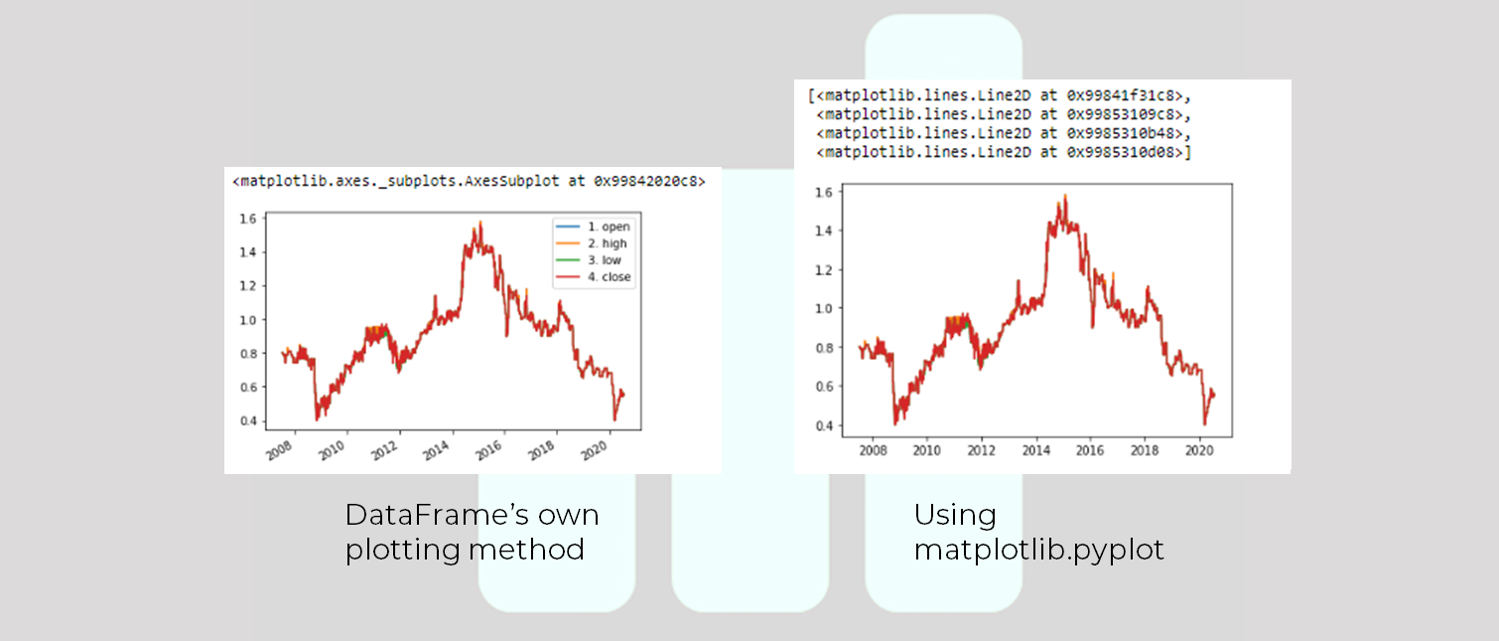

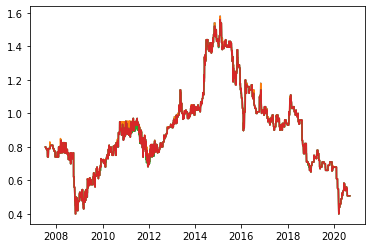

In [16]:
# Step 7: Drop "5. volume" and store the new DataFrame in a new variable, then plot the rest of the columns

plt.plot(df.drop('5. volume', axis =1))

# Engineer new features
Now that you've visualized the prices...what's next? It's good to also see if there are any direct seasonal variations in the price.

To do so, we will need to separate the dates into things like the month, the day, and the day of the week. Can we extract more information out of what we currently have? The answer is yes!

Remember our DataFrame index that is now a DateTime object? We can actually use some nifty methods to get those information! We will be extracting:
1. Day of the week (0-6, 0 = Monday, 6 = Sunday)
2. Month (1-12, 1 = January, 12 = December)
3. Day of the month (1-31)

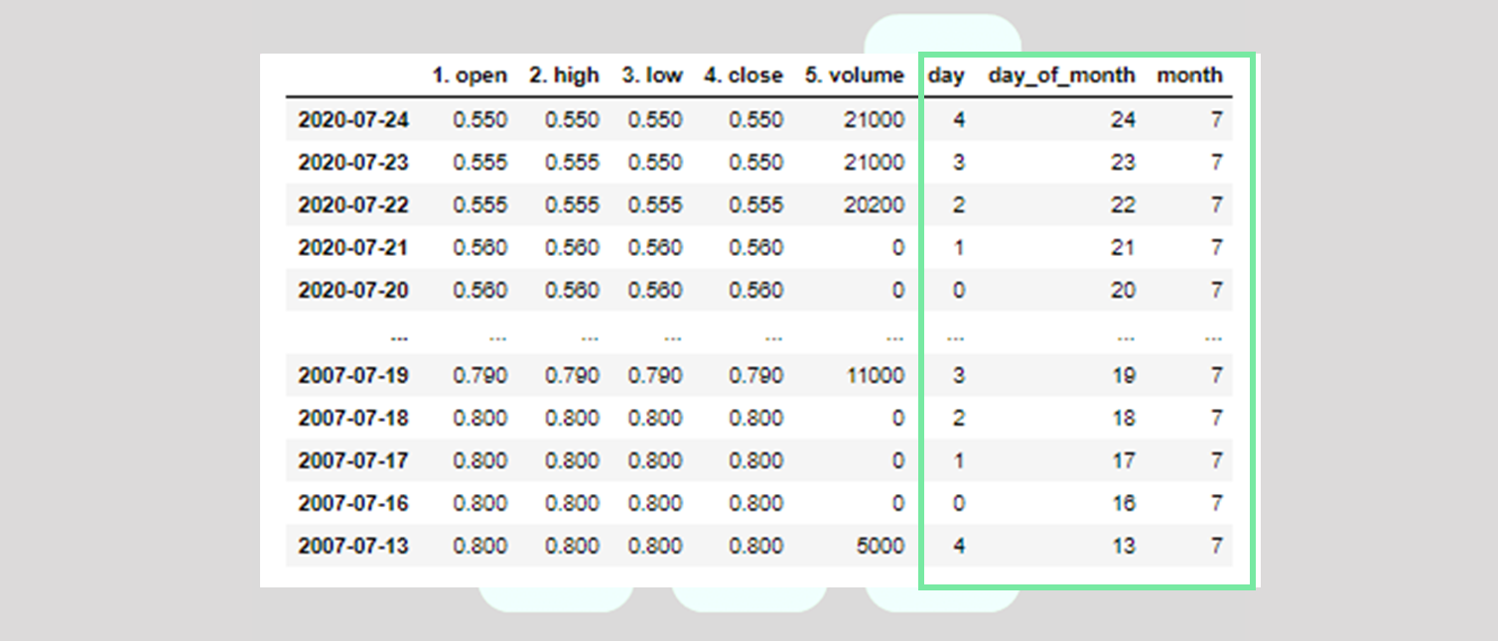

You should see something like this at the end. 

### Step 8: Get day of week, day of month, and month

Hint: Look up <strong>"get day from datetime python"</strong>

In [20]:
# Step 8a: get the day of week and store it in a new column

df['day'] = df.index.dayofweek
df.head()

,1. open,2. high,3. low,4. close,5. volume,day
2020-09-08,0.5081,0.5081,0.5081,0.5081,0,1
2020-09-04,0.5081,0.5081,0.5081,0.5081,0,4
2020-09-03,0.5081,0.5081,0.5081,0.5081,0,3
2020-09-02,0.5081,0.5081,0.5081,0.5081,0,2
2020-09-01,0.5081,0.5081,0.5081,0.5081,0,1


In [21]:
# Step 8b: get day of the month and store it in a new column
df['day_of_month'] = df.index.day
df.head()

,1. open,2. high,3. low,4. close,5. volume,day,day_of_month
2020-09-08,0.5081,0.5081,0.5081,0.5081,0,1,8
2020-09-04,0.5081,0.5081,0.5081,0.5081,0,4,4
2020-09-03,0.5081,0.5081,0.5081,0.5081,0,3,3
2020-09-02,0.5081,0.5081,0.5081,0.5081,0,2,2
2020-09-01,0.5081,0.5081,0.5081,0.5081,0,1,1


In [22]:
# Step 8c: get the month and store it in a new column

df['month'] = df.index.month
df.head()

,1. open,2. high,3. low,4. close,5. volume,day,day_of_month,month
2020-09-08,0.5081,0.5081,0.5081,0.5081,0,1,8,9
2020-09-04,0.5081,0.5081,0.5081,0.5081,0,4,4,9
2020-09-03,0.5081,0.5081,0.5081,0.5081,0,3,3,9
2020-09-02,0.5081,0.5081,0.5081,0.5081,0,2,2,9
2020-09-01,0.5081,0.5081,0.5081,0.5081,0,1,1,9


### Step 9: Visualize the closing price by day, day of week, and month
Now that we have the new features extracted from the date, we can perform more visualization to identify additional patterns, if any.

We will be using boxplots to visualize the close price. More info here: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

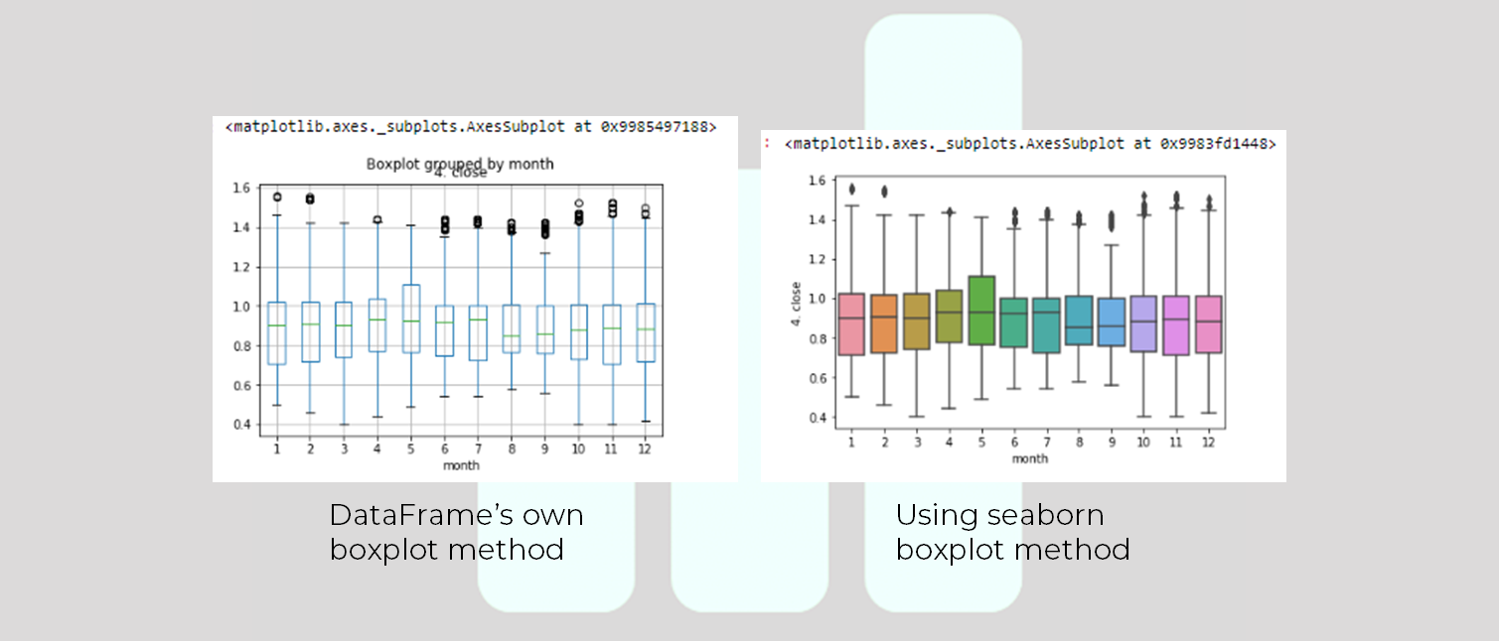

We won't be showing all of the images, but here is a representative example when you plot a barplot of the close prices based on month. You should also plot boxplots for day and day of week. 

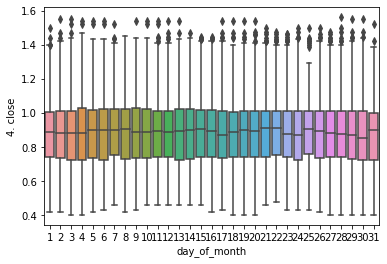

In [25]:
# Step 9a: Plot boxplots of close prices, separated by day of week 

sns.boxplot(df['day_of_month'], df['4. close'])

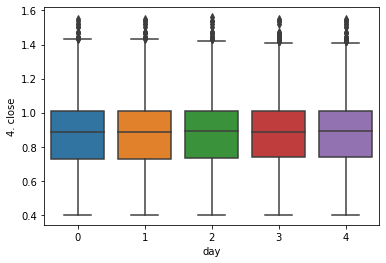

In [24]:
# Step 9b: Plot boxplots of close prices, separated by day of month

sns.boxplot(df['day'], df['4. close'])

In [ ]:
# Step 9c: Plot boxplots of close prices, separated by month

Looks like there doesn't seem to be any wild seasonal variation in the dataset, i.e., the boxplots don't differ too much in height.

### Step 10: Export your DataFrame as a CSV

You know the drill. Make sure your DataFrame has the following columns before you export them as CSV:
1. date (as the index)
2. "1. open"
3. "2. high"
4. "3. low"
5. "4. close"
6. "5. volume"
7. day
8. day_of_month
9. month

See you in Part III, where we will work on some machine learning!

In [26]:
# Step 10: Export your CSV (use a different filename as the one you exported from Part I)

df.to_csv('data_expanded_csv')